In [15]:
from LineSplit import LineSplit
from WordSplit import WordSplit
from nltk.translate.bleu_score import sentence_bleu

In [16]:
# check files

files = ['summary_souravGaungly.txt', 'Ref_SouravGaungly_sir.txt', 'Ref_SouravGaungly_chandni.txt', 'Ref_SouravGaungly_mihir.txt', 'Ref_SouravGaungly_sweta.txt']

for file in files:
    print(f"Lines Count {file}: ", len(LineSplit(file)))

Lines Count summary_souravGaungly.txt:  19
Lines Count Ref_SouravGaungly_sir.txt:  19
Lines Count Ref_SouravGaungly_chandni.txt:  19
Lines Count Ref_SouravGaungly_mihir.txt:  19
Lines Count Ref_SouravGaungly_sweta.txt:  19


In [17]:
conf_matrix = []

In [18]:
for ref in files:
    refList = WordSplit(LineSplit(ref))
    row = []
    for can in files:
        canList = WordSplit(LineSplit(can))
        
        refListCopy = refList.copy()
        canFinal = []
        refFinal = []
        
        for item in canList:
            if item in refListCopy:
                canFinal.append(item)
                refFinal.append(item)
                canList.remove(item)
                refListCopy.remove(item)

        canFinal += canList
        refFinal += refListCopy
        
        row.append(sentence_bleu([refFinal], canFinal))
    conf_matrix.append(row)

In [19]:
conf_matrix

[[1.0,
  0.40599218948669863,
  0.576513357982895,
  0.4685916927943526,
  0.43664205489557956],
 [0.4445831688528176,
  1.0,
  0.5341119208979732,
  0.4560917540605371,
  0.32424806686390734],
 [0.6013856582960584,
  0.49019684646713146,
  1.0,
  0.5051781154332352,
  0.36898975204619683],
 [0.5337995321713016,
  0.45030631602815574,
  0.5248261466484716,
  1.0,
  0.3597594842136319],
 [0.4302044373807632,
  0.26286392855918256,
  0.33733132289357043,
  0.3167961320433595,
  1.0]]

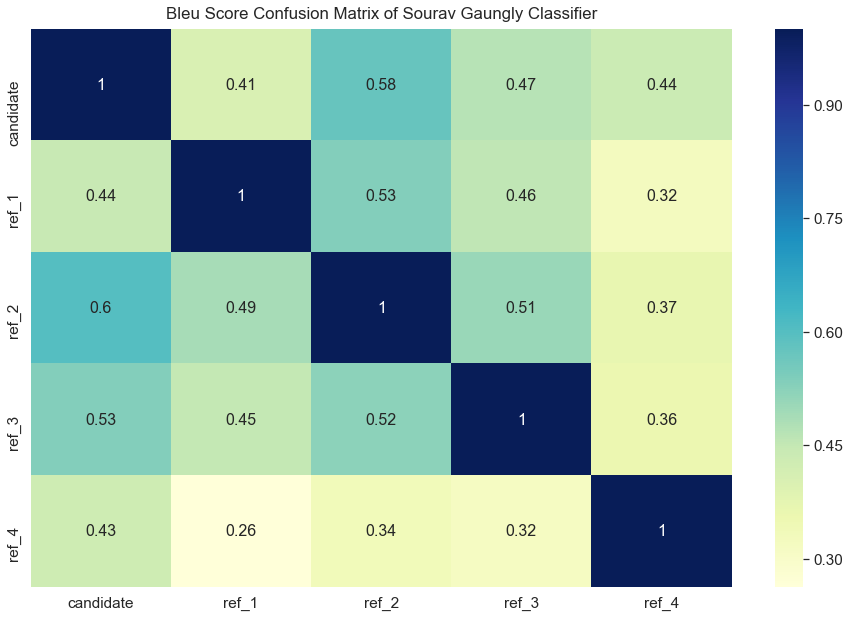

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# 'candidate', 'ref_sir', 'ref_chandni', 'ref_mihir', 'ref_sweta'
df_cm = pd.DataFrame(conf_matrix, index = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'],
                  columns = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'])


sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="YlGnBu")# font size
plt.title(label="Bleu Score Confusion Matrix of Sourav Gaungly Classifier", pad=10.0) 
plt.savefig('confusion_bleu_souravgaungly.png')
plt.show()